In [1]:
import torch
import matplotlib.pyplot as plt

import os
from dotenv import load_dotenv
load_dotenv()
print(os.environ['INFUSION_DATASETS'])

import revert
import revert.models as rm
from revert import infusion

/home/oli/revert/datasets/icp


# Pulse extraction

This notebook describes the pulse segmentation and selection pipeline, implemented in [scripts-infusion/extract_pulses.py](https://github.com/opeltre/revert/scripts-infusion/extract_pulses.py). It was used to produce some of the figures published in _Brain and Spine_.

inf_20170201124255_INF2


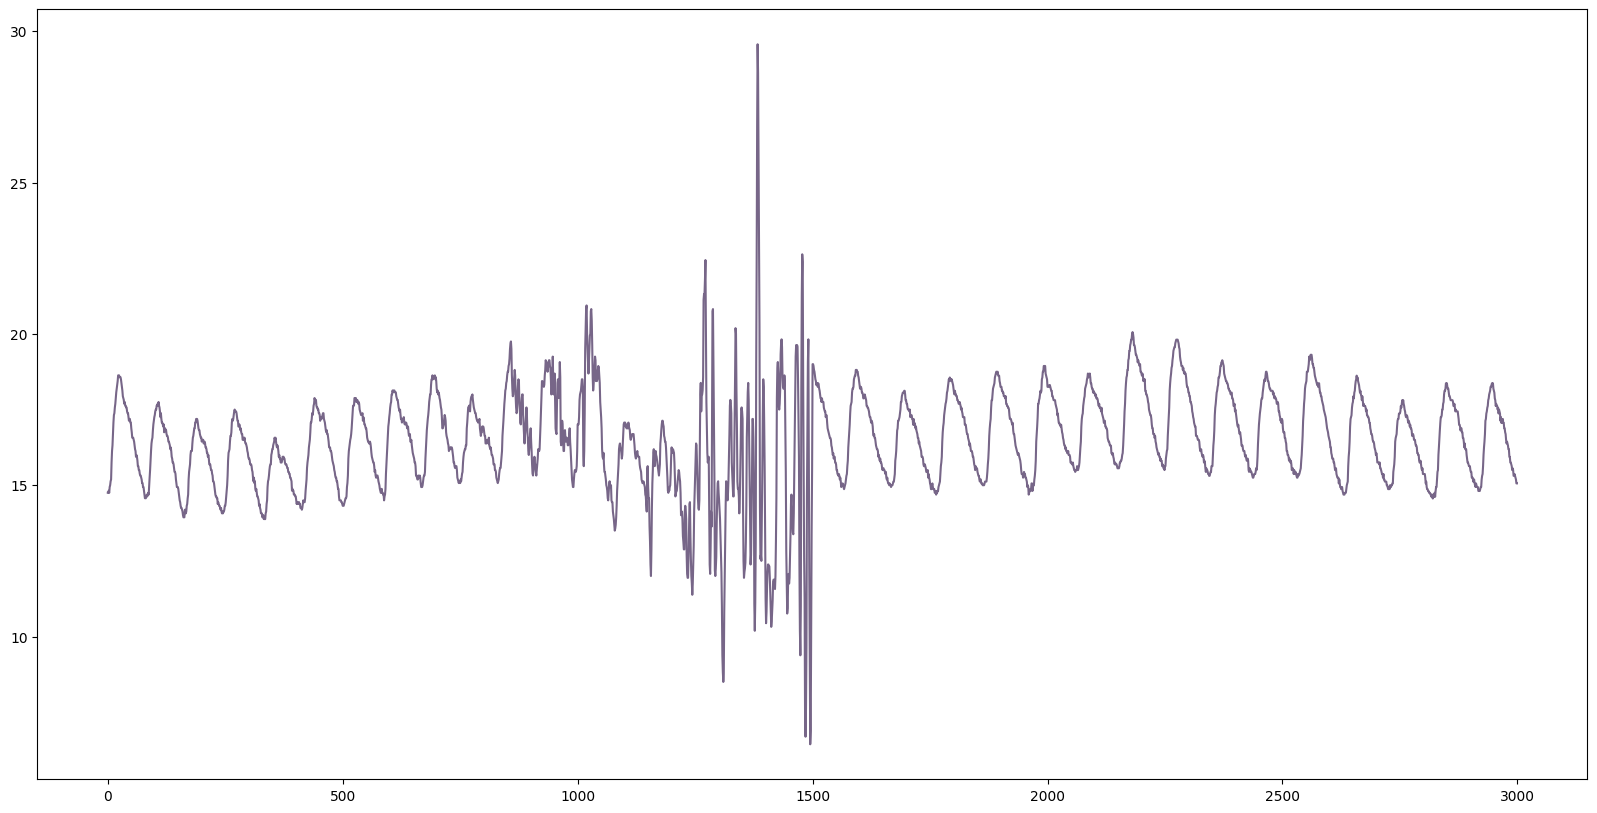

In [55]:
""" Load ICP portion from file """

db = infusion.Dataset('no_shunt')
f = db.get(190)
print(f.key)

minutes = .5
fs      = 100
Npts    = int(minutes * 60 * fs)

icp = f.icp(Npts)

plt.figure(figsize=(20, 10))
plt.plot(icp, c='#768')
plt.savefig('img/raw_icp.svg')

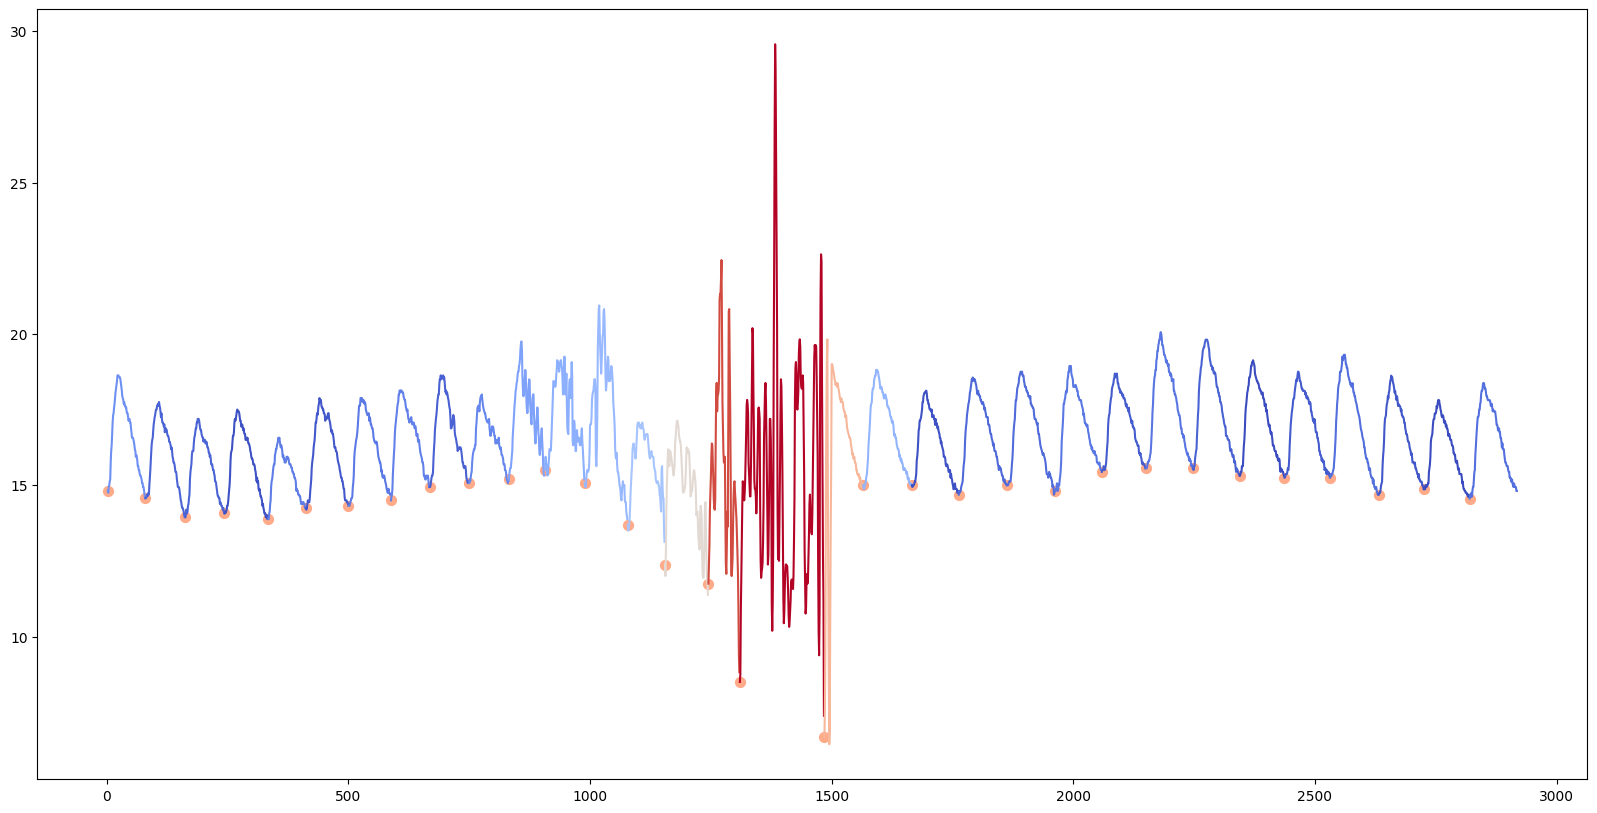

In [50]:
extractPulses = infusion.ExtractPulses(minutes=minutes)

x_all, masks_all, cuts = extractPulses.extract_pulses(icp)
loss_x = extractPulses.loss(x_all)
color = (loss_x - loss_x.min()) / (loss_x.max() - loss_x.min())


plt.figure(figsize=(20, 10))
for i, begin, end in zip(range(x_all.shape[0]), cuts[:-1], cuts[1:]):
    plt.plot(torch.arange(begin, end), 
             icp[begin:end], 
             c=plt.cm.coolwarm(color[i]))
    plt.scatter(cuts[i], icp[begin], s=50, color='#fa8')
plt.savefig('img/icp_loss.svg')


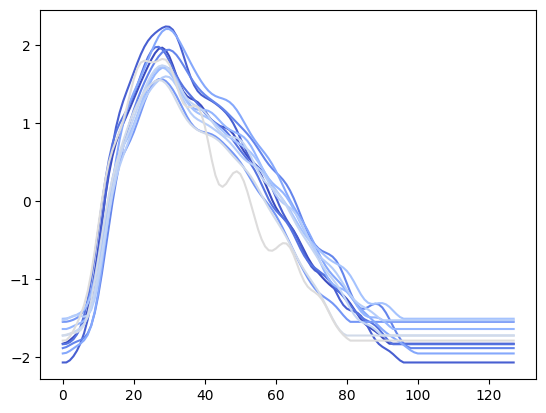

In [40]:
""" Plot best pulses """ 

xs, masks = extractPulses(icp)
Npulses = 12
color = torch.linspace(0, .5, Npulses)

for i, x in enumerate(xs[:Npulses]):
    plt.plot(x, color=plt.cm.coolwarm(color[i]))
plt.savefig('img/best_pulses.svg')


In [23]:
datadir = os.environ['INFUSION_DATASETS']
pulse_data = torch.load(os.path.join(datadir, 'baseline-no_shunt.pt'))
print(list(pulse_data.keys()))

['masks', 'pulses', 'means', 'slopes', 'keys', 'y_quant', 'amp', 'errors']


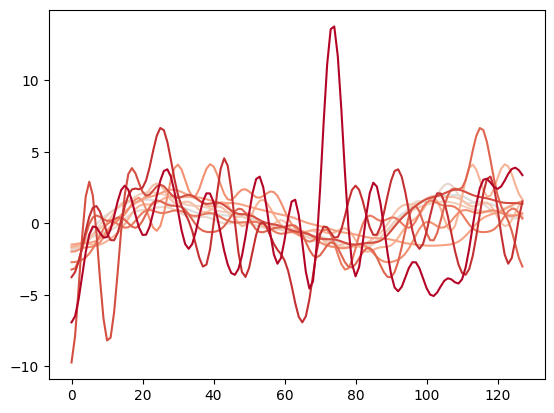

In [43]:
""" Plot worst pulses """
worst = loss_x.sort(0)
x_worst = x_all[worst.indices[-Npulses:]]
color = torch.linspace(.5, 1, Npulses)

for i, x in enumerate(x_worst):
    plt.plot(x_worst[i], color=plt.cm.coolwarm(color[i]))
plt.savefig('img/worst_pulses.svg')